In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression

In [3]:
import os
os.getcwd()

'/Users/shikharaikhare/Documents/Data_Mining/Project'

In [4]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
len(df)

180519

In [7]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [8]:
df.rename(columns={'order date (DateOrders)': 'Order_Date'}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [10]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [11]:
missing_values = df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market   

### SMART QUESTION 3: 

#### How does the product category relate to sales performance, and can this insight inform inventory stocking?

##### Check the unique product categories in the dataset

In [12]:
print(df['Category Name'].unique())

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']


In [13]:
category_count = df['Category Name'].nunique()

In [14]:
print(category_count)

50


In [15]:
print(df['Category Name'].value_counts())

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [16]:
category_sales = df.groupby('Category Name')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by = 'Sales', ascending = False)

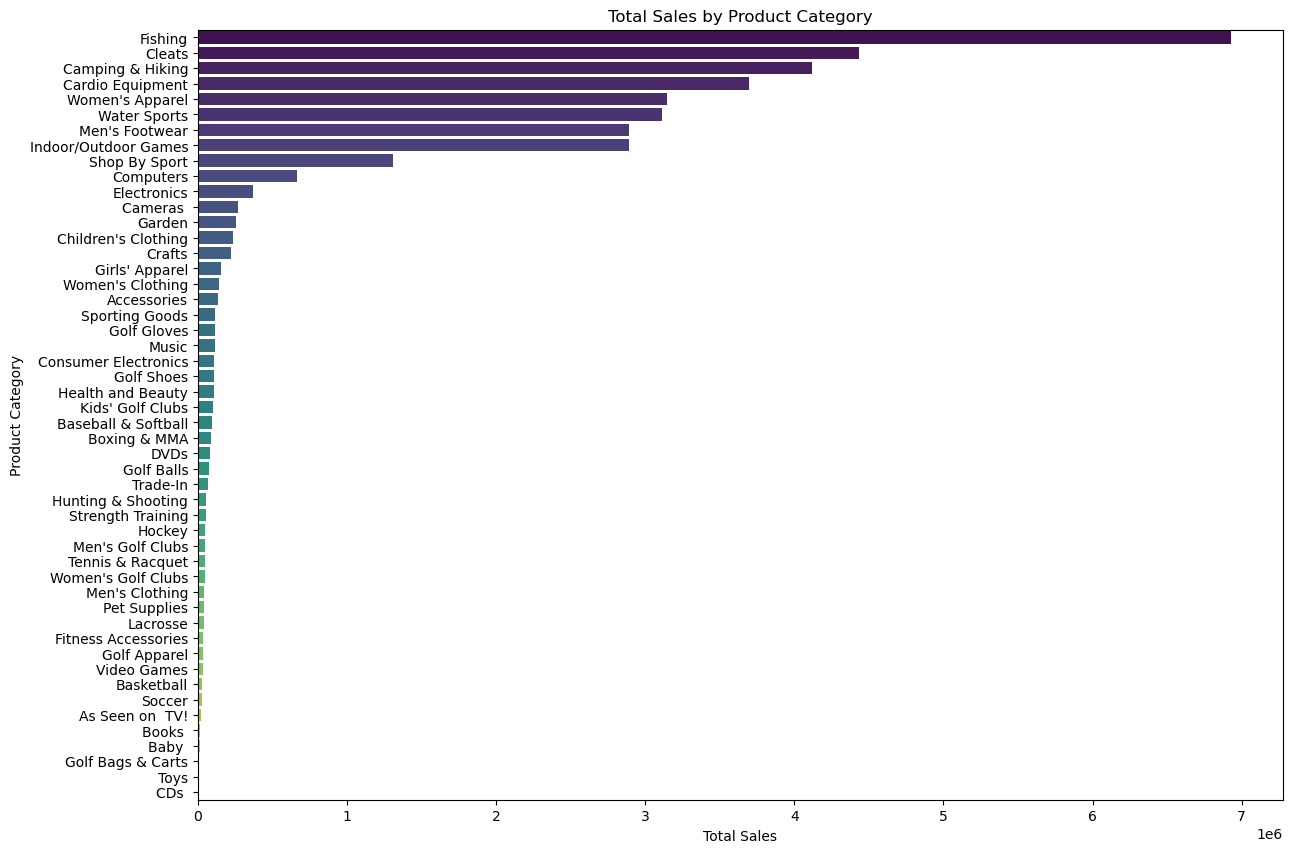

In [17]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='Category Name', data=category_sales, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Total Sales by Product Category')
plt.show()

In [18]:
data = df.copy()

In [19]:
data.size

9567507

In [20]:
data['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

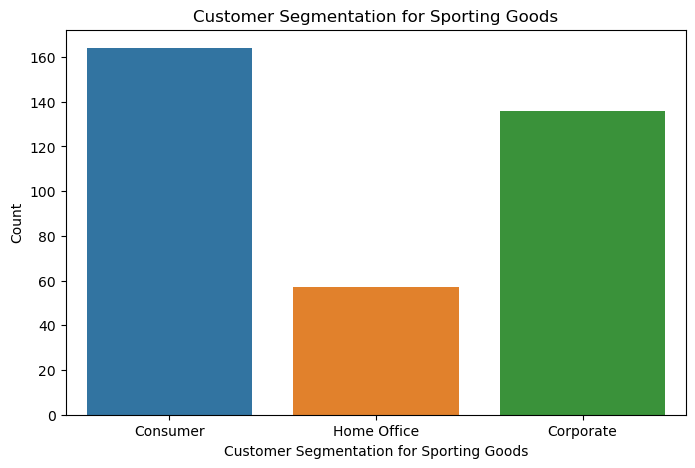

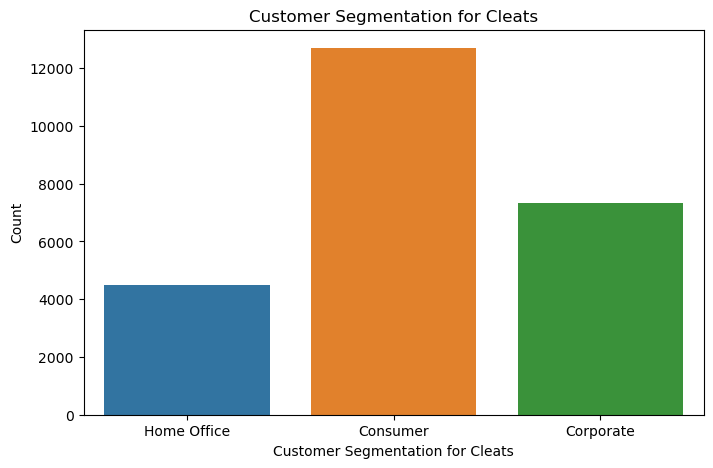

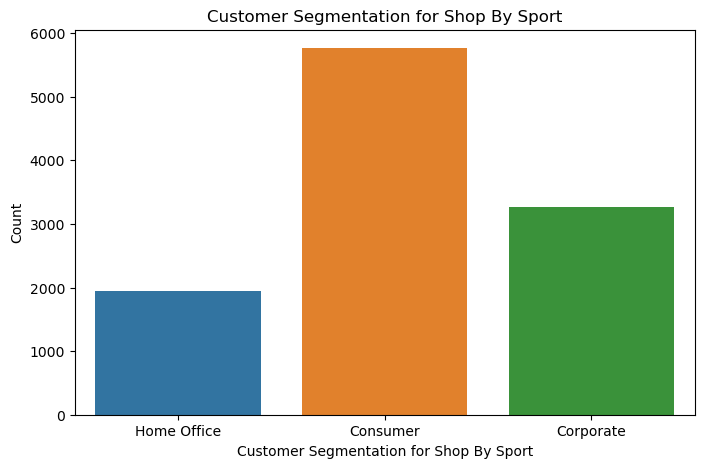

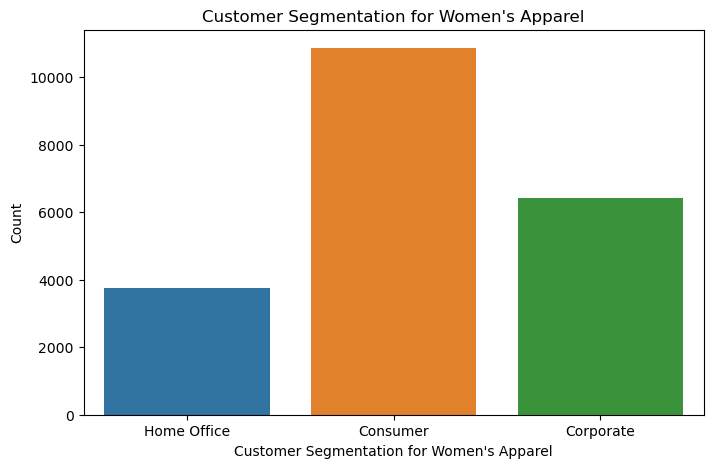

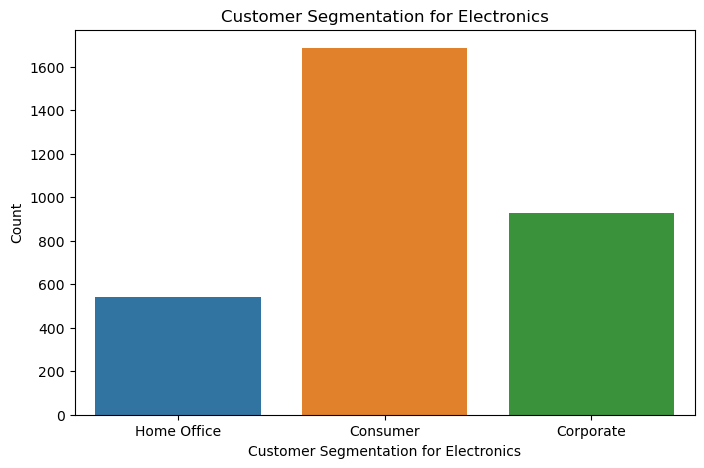

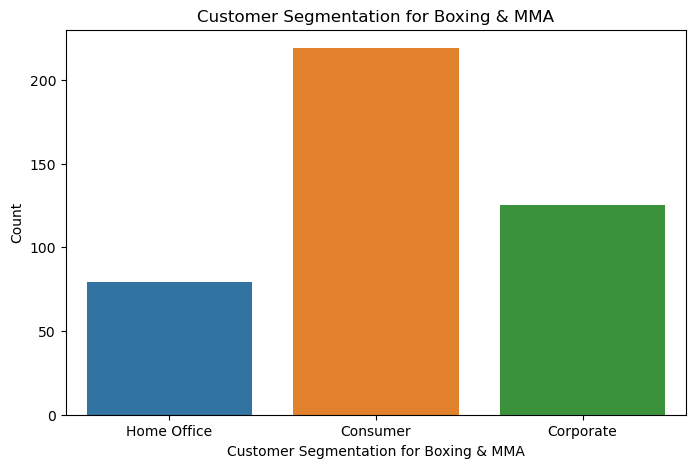

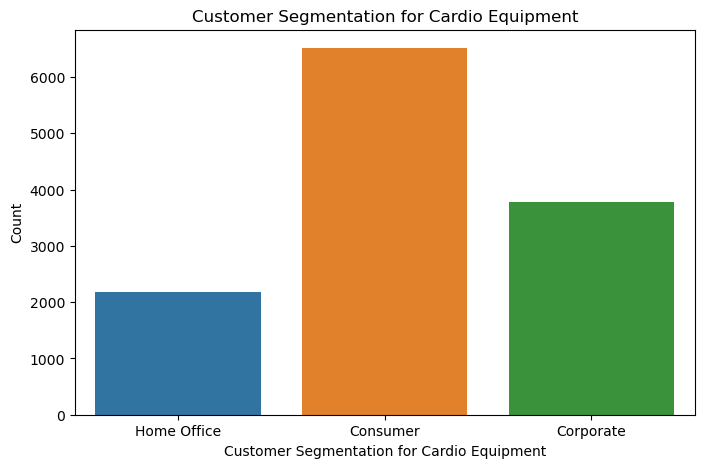

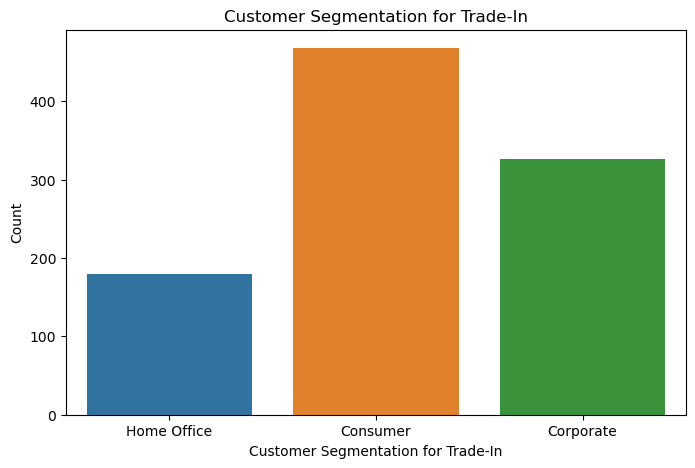

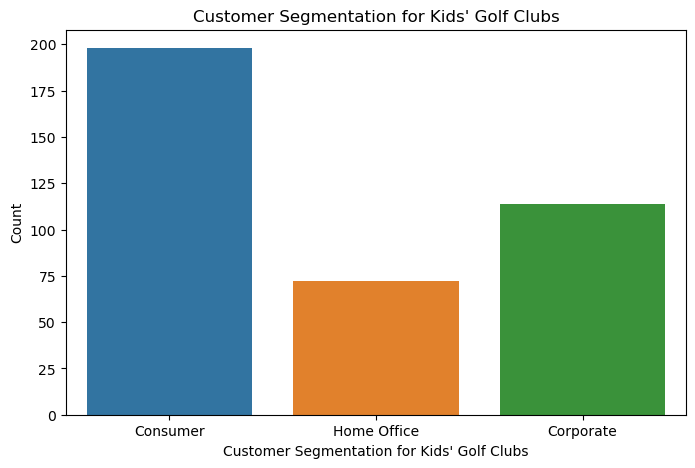

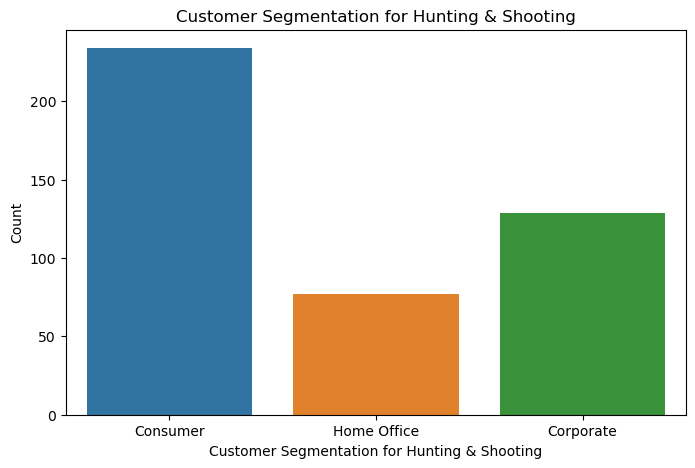

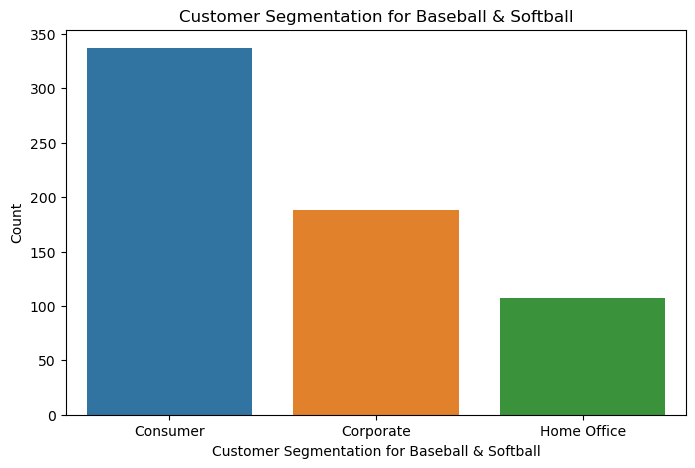

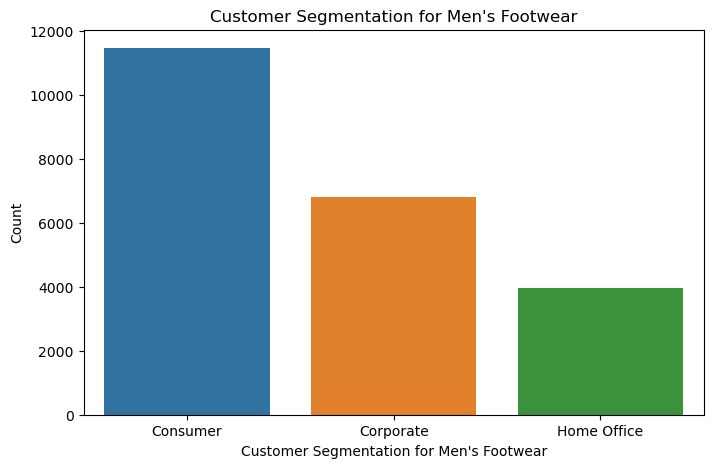

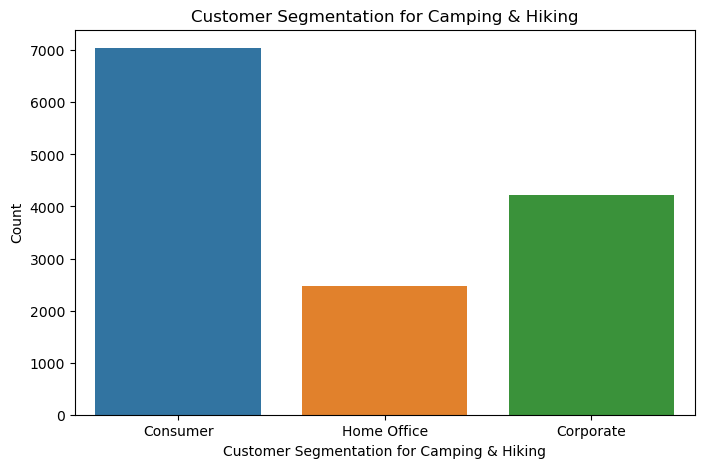

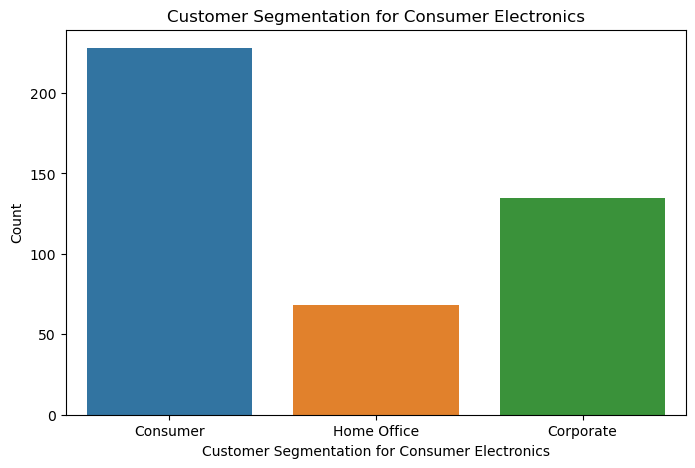

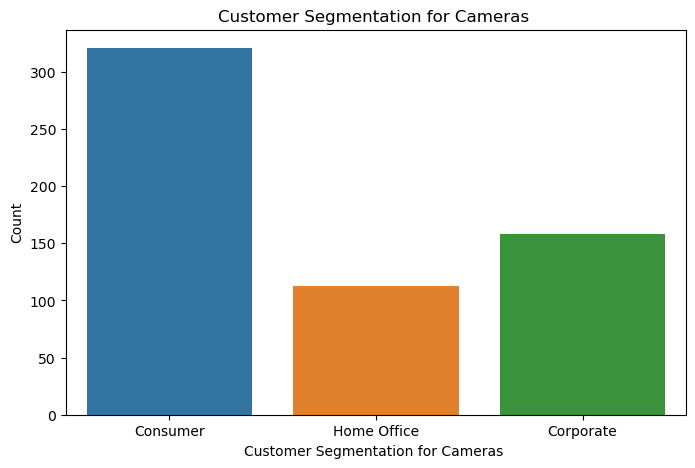

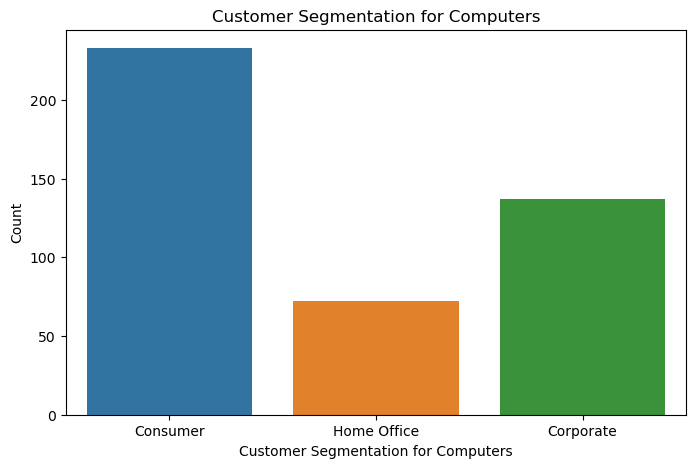

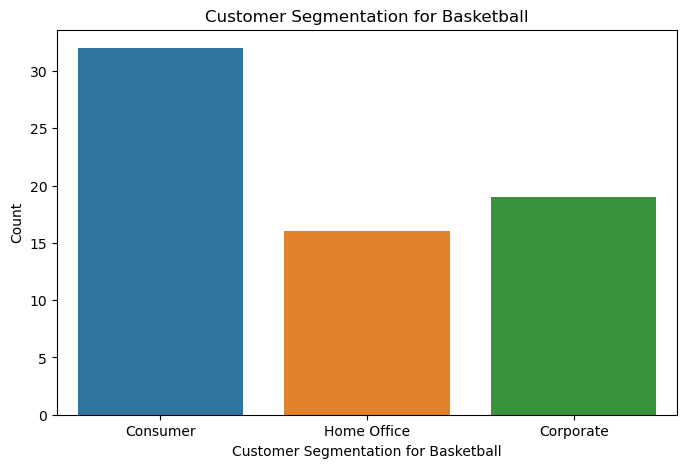

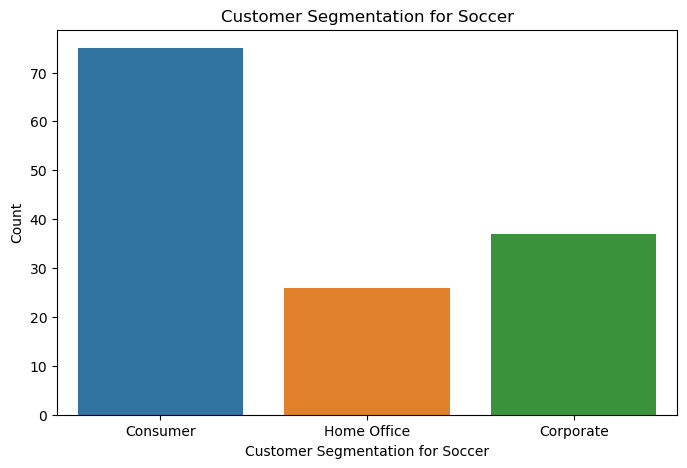

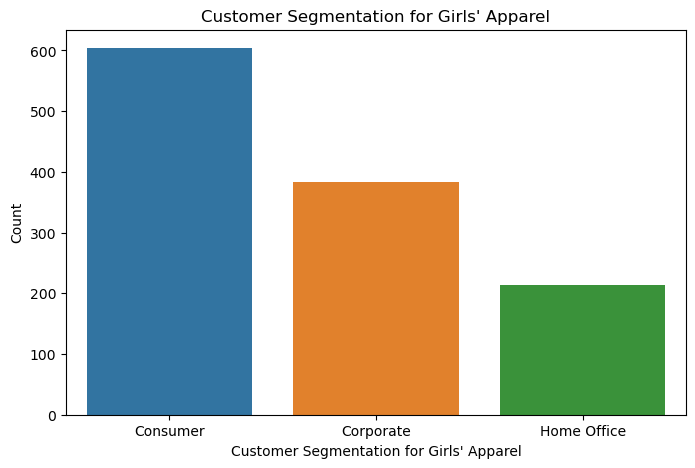

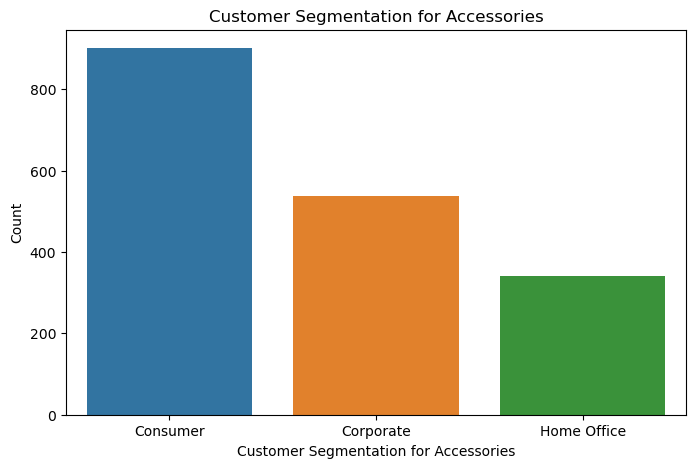

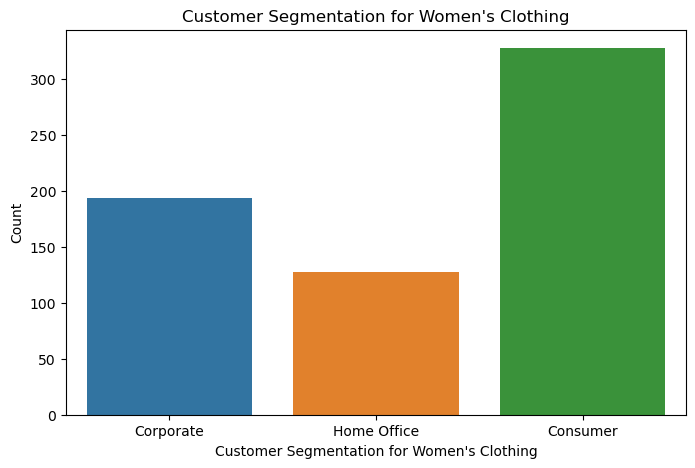

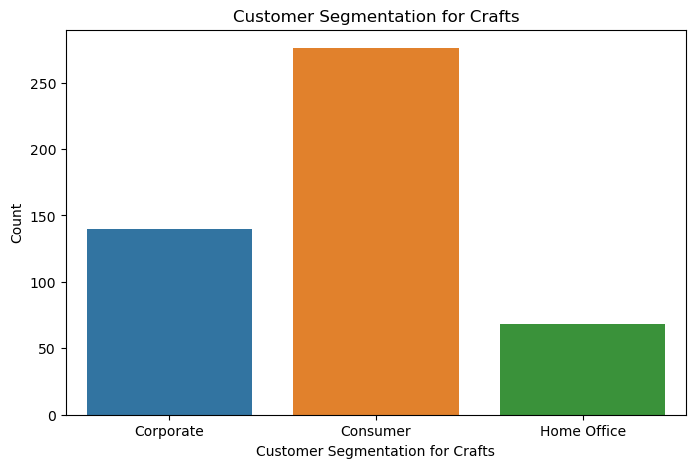

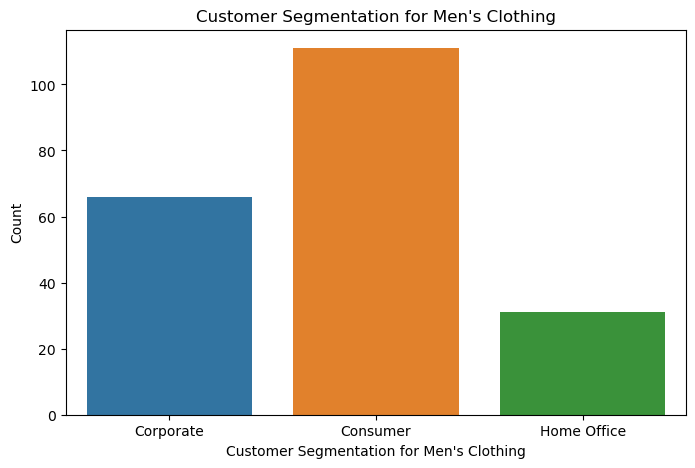

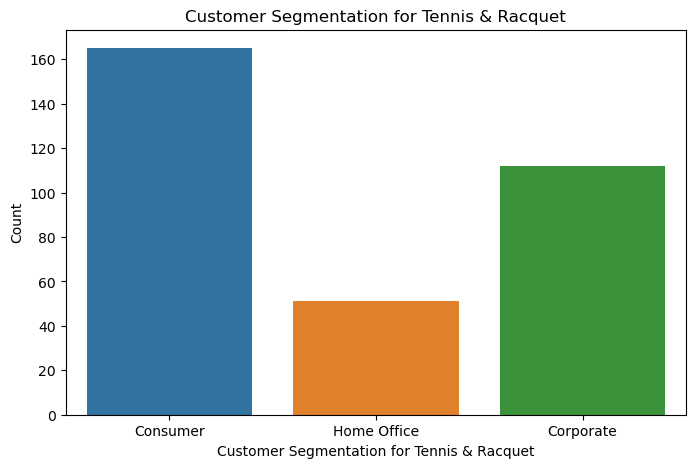

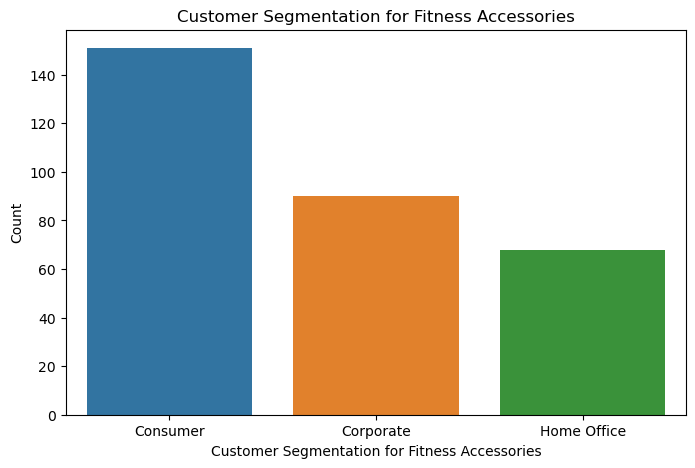

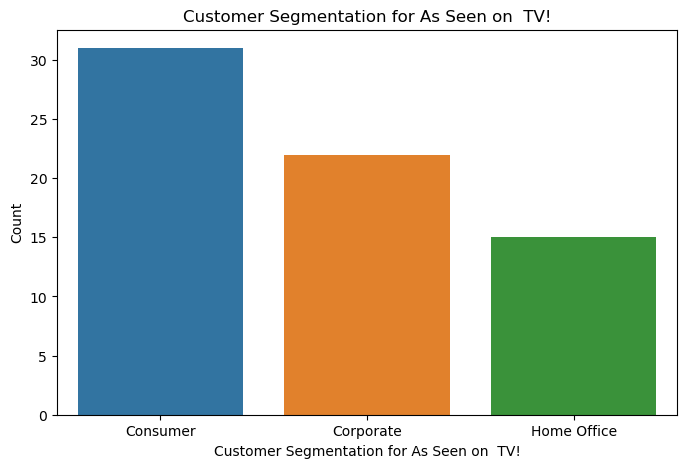

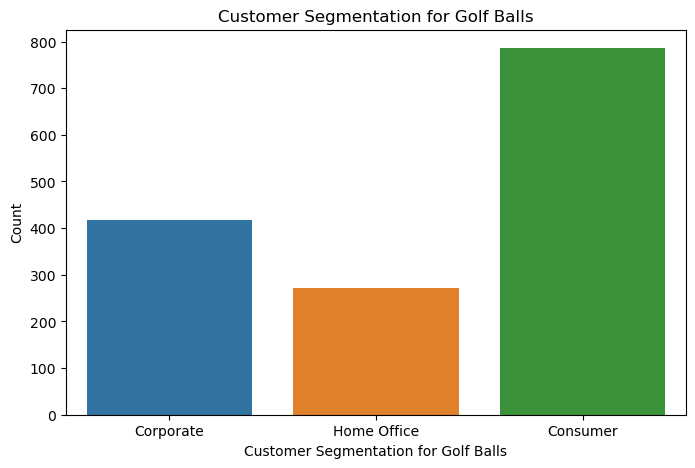

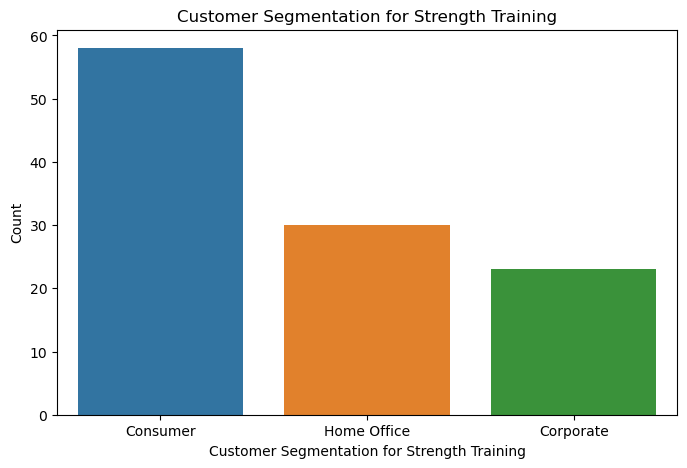

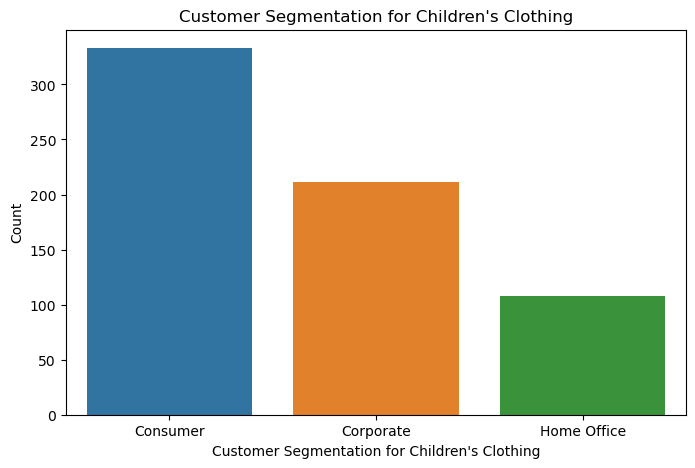

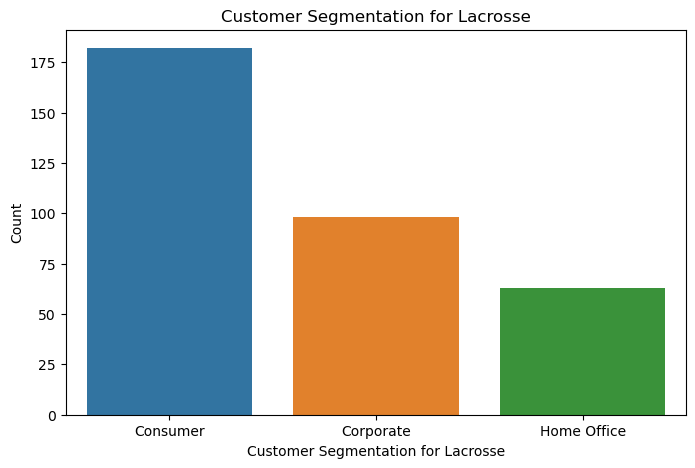

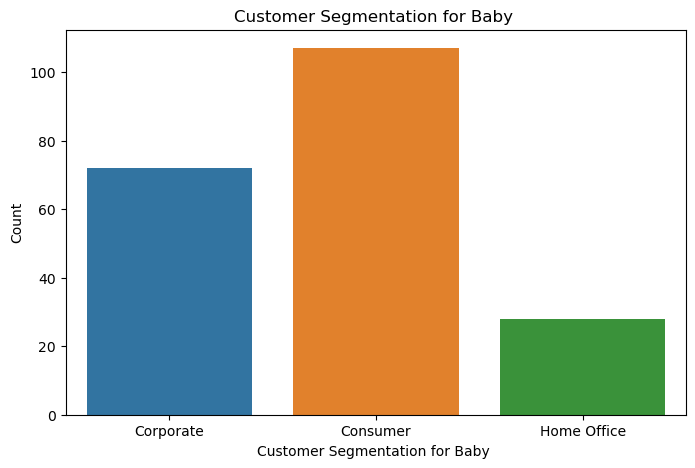

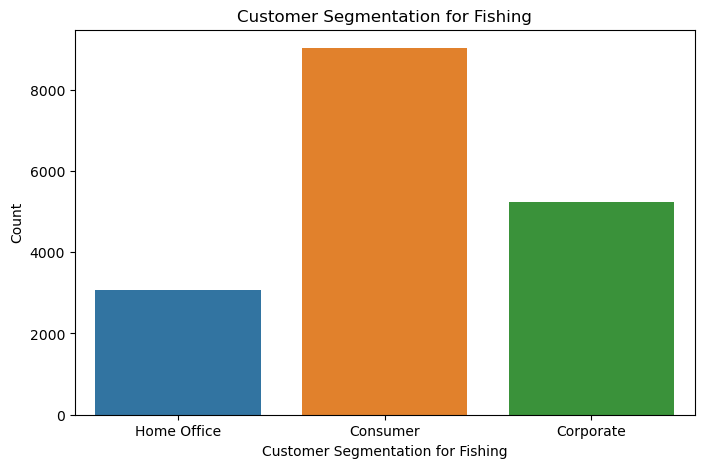

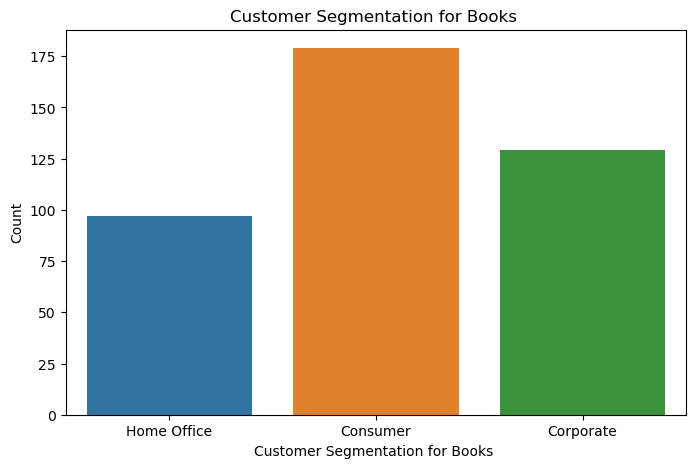

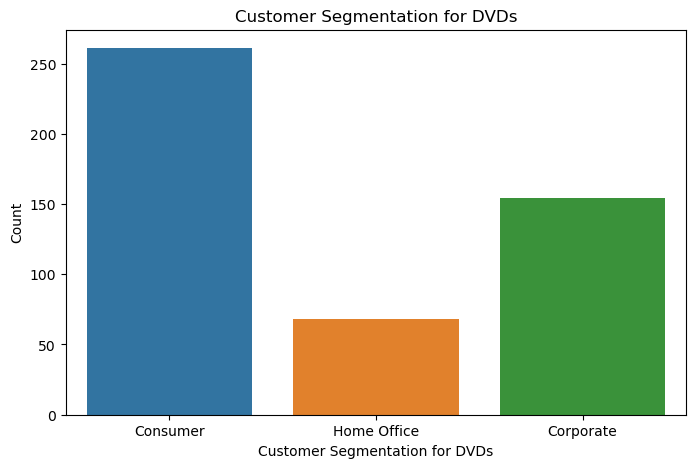

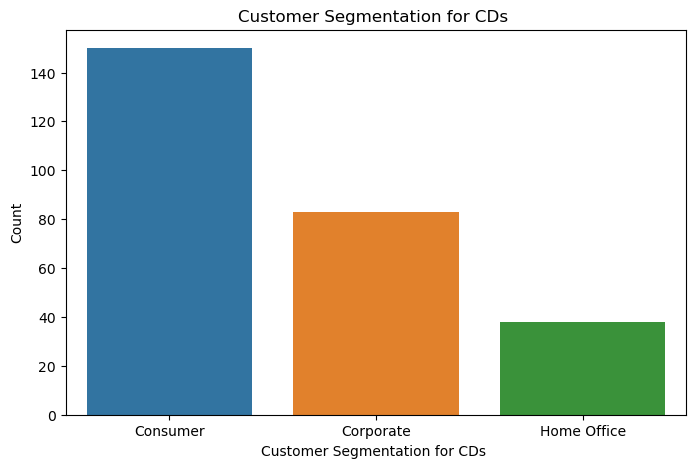

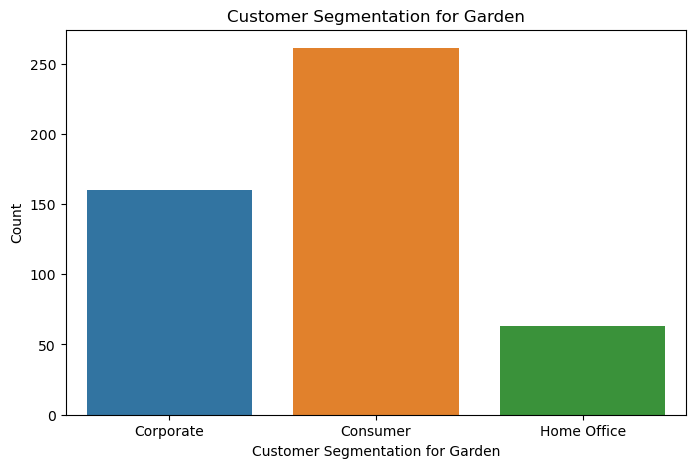

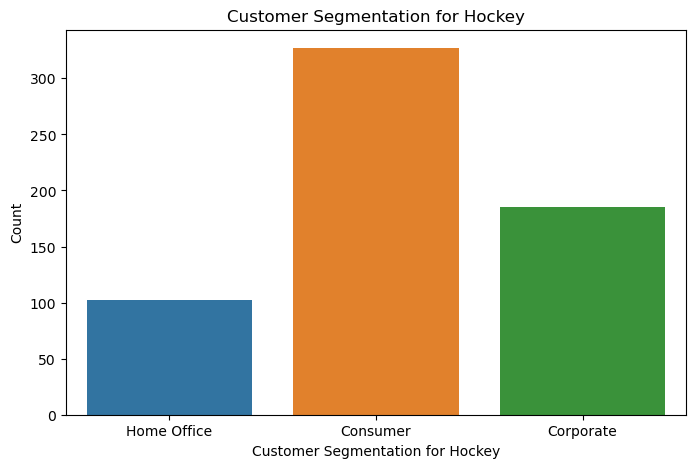

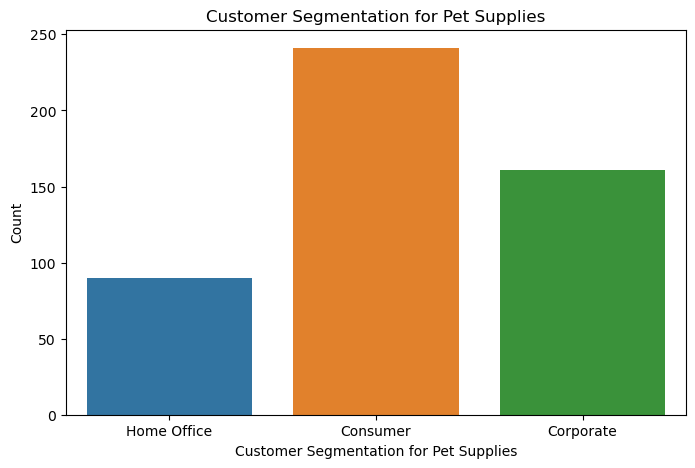

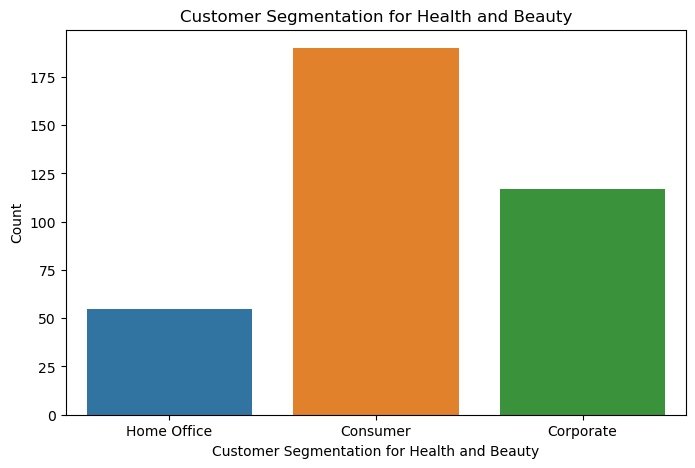

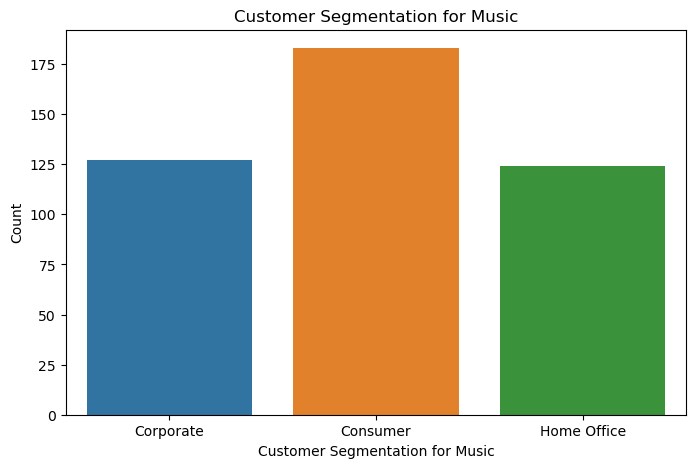

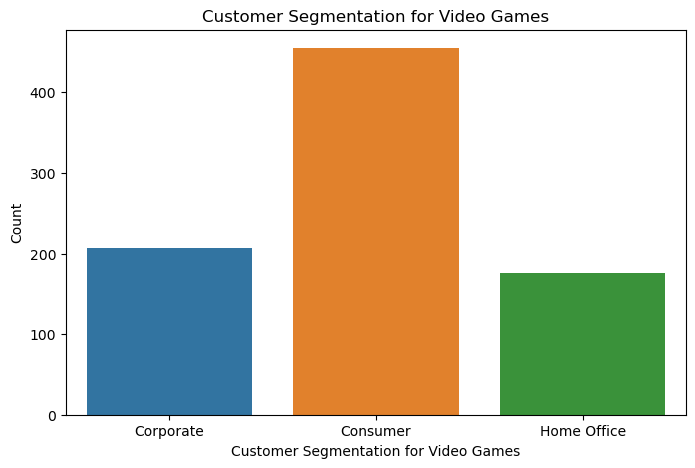

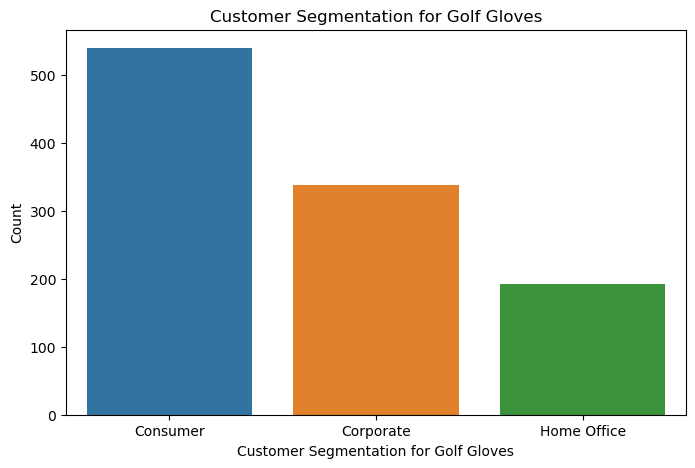

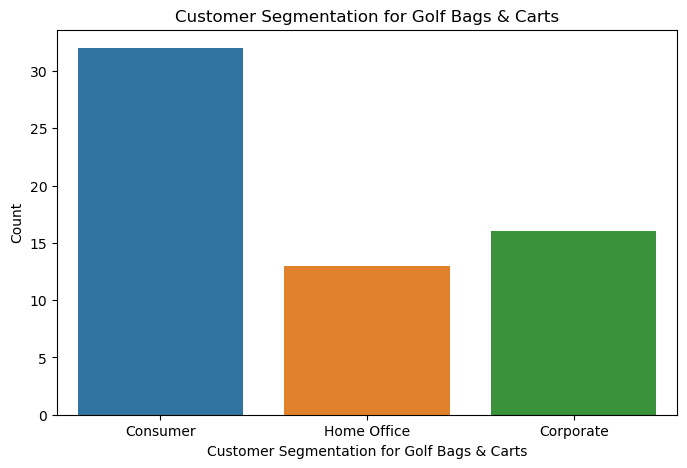

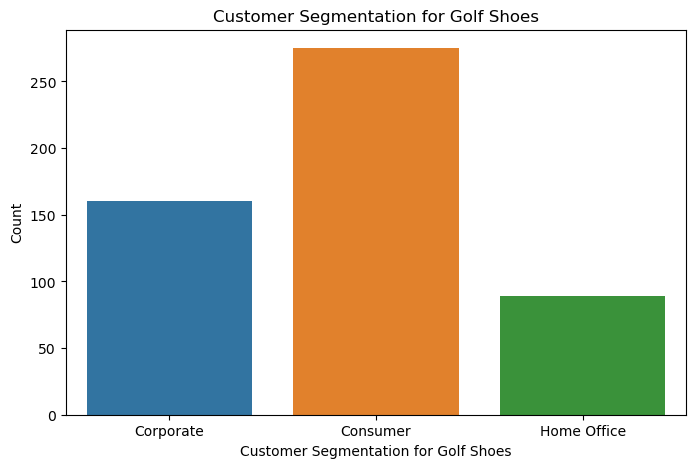

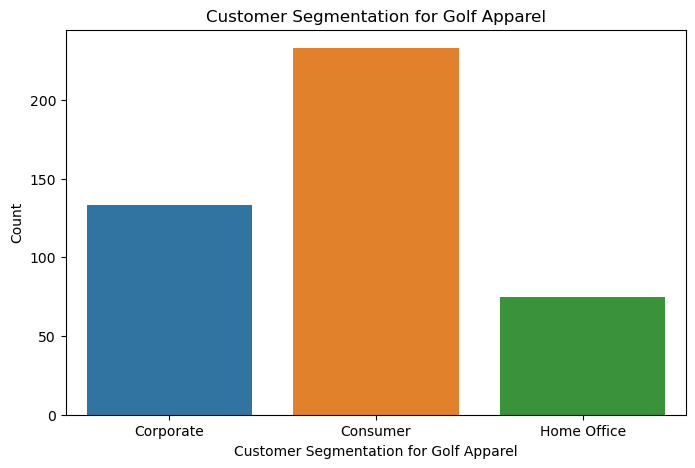

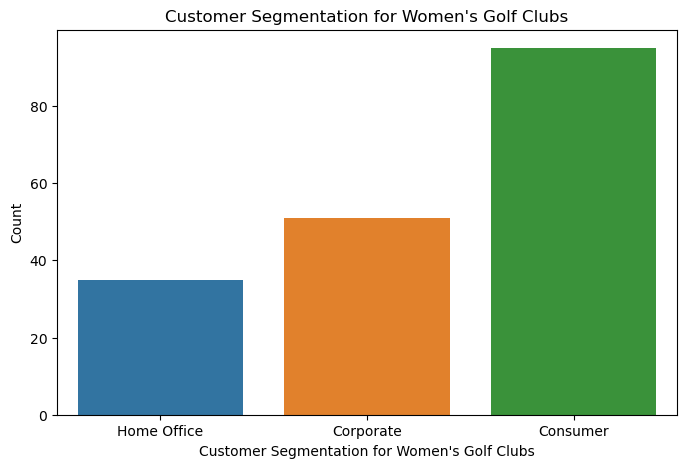

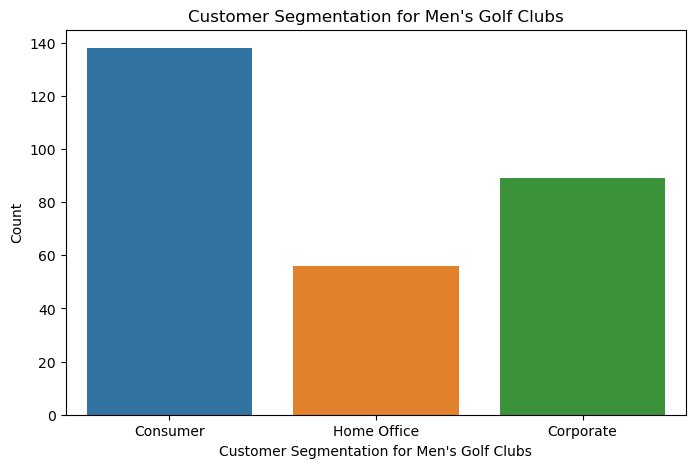

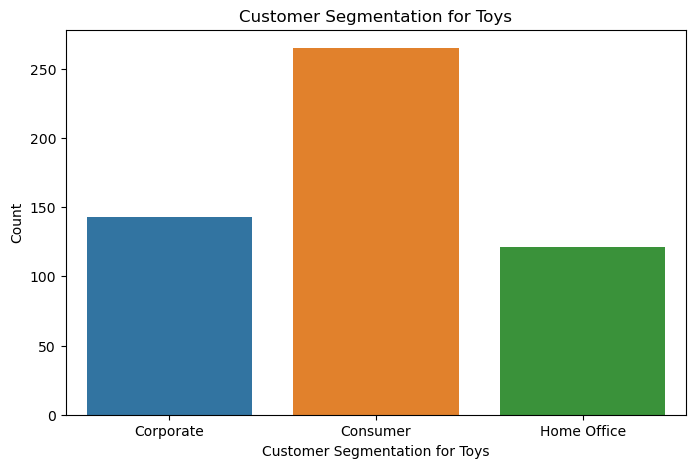

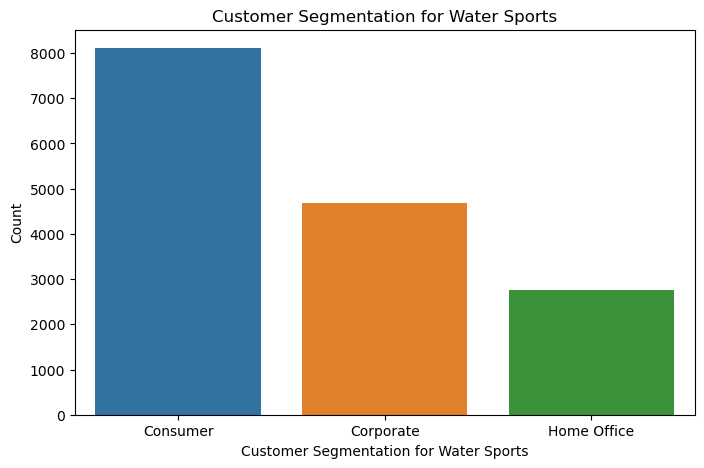

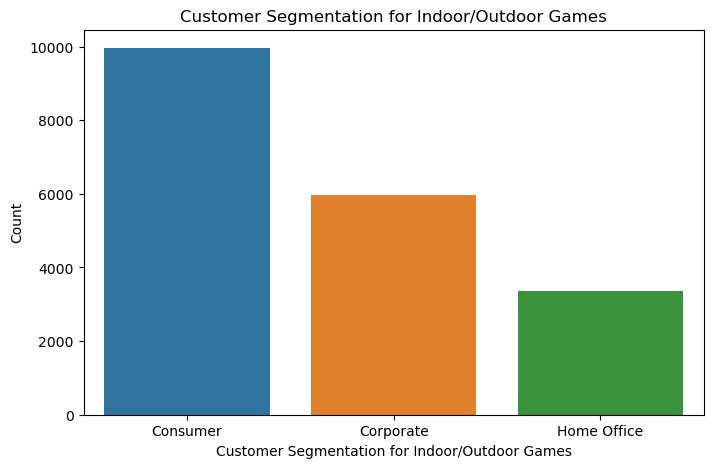

In [21]:
unique_categories = data['Category Name'].unique()

# Plotting separate count plots for each category
for category in unique_categories:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data[data['Category Name'] == category], x='Customer Segment')
    plt.title(f'Customer Segmentation for {category}')
    plt.xlabel(f'Customer Segmentation for {category}')
    plt.ylabel('Count')
    plt.show()



#### Feature Engineering:

In [22]:
search_values = ["Women's Apparel", "Children's Clothing", "Women's Clothing", "Girls' Apparel", "Men's Clothing", 'Baby']

# Count the number of rows containing specified values in 'Category Name' column
count_rows = data[data['Category Name'].isin(search_values)].shape[0]

print(f"Number of rows containing specified values: {count_rows}")

Number of rows containing specified values: 23746


In [23]:
search_values = ['Cleats', "Men's Footwear", 'Fishing', 'Indoor/Outdoor Games',
                       'Water Sports', 'Camping & Hiking', 'Cardio Equipment', 'Shop By Sport',
                       "Golf Balls", "Golf Gloves", 'Trade-In', 'Video Games', "Toys"
                        "Baseball & Softball", "Hockey", "Lacrosse", "Golf Apparel", "Hunting & Shooting", 
                        "Boxing & MMA", "Kids' Golf Clubs", "Fitness Accessories", "Men's Golf Clubs", "Strength Training",
                       "Tennis & Racquet", "Sporting Goods", "Golf Shoes", 'Soccer', 'Basketball', "Women's Golf Clubs"]

# Count the number of rows containing specified values in 'Category Name' column
count_rows = data[data['Category Name'].isin(search_values)].shape[0]

print(f"Number of rows containing specified values: {count_rows}")

Number of rows containing specified values: 145460


In [24]:
search_values = ['Electronics', 'Gadgets', 'Cameras', 'DVDs', 'Computers', 'Consumer Electronics',
                    'Music', 'CDs']

# Count the number of rows containing specified values in 'Category Name' column
count_rows = data[data['Category Name'].isin(search_values)].shape[0]

print(f"Number of rows containing specified values: {count_rows}")

Number of rows containing specified values: 4946


In [25]:
search_values = ['Health and Beauty', 'Accessories']

# Count the number of rows containing specified values in 'Category Name' column
count_rows = data[data['Category Name'].isin(search_values)].shape[0]

print(f"Number of rows containing specified values: {count_rows}")

Number of rows containing specified values: 2142


In [26]:
search_values = ["Pet Supplies", "Crafts", "Garden", "Music", "Books"]

# Count the number of rows containing specified values in 'Category Name' column
count_rows = data[data['Category Name'].isin(search_values)].shape[0]

print(f"Number of rows containing specified values: {count_rows}")

Number of rows containing specified values: 1894


In [27]:
len(data['Sales'])

180519

In [28]:
def categorize_items(category_name):
    sports_keywords = ['Cleats', "Men's Footwear", 'Fishing', 'Indoor/Outdoor Games',
                       'Water Sports', 'Camping & Hiking', 'Cardio Equipment', 'Shop By Sport',
                       "Golf Balls", "Golf Gloves", 'Trade-In', 'Video Games', "Toys"
                        "Baseball & Softball", "Hockey", "Lacrosse", "Golf Apparel", "Hunting & Shooting", 
                        "Boxing & MMA", "Kids' Golf Clubs", "Fitness Accessories", "Men's Golf Clubs", "Strength Training",
                       "Tennis & Racquet", "Sporting Goods", "Golf Shoes", 'Soccer', 'Basketball', "Women's Golf Clubs"]

    clothing_keywords = ["Women's Apparel", "Children's Clothing", "Women's Clothing", "Girls' Apparel",
                 "Men's Clothing", 'Baby']

    gadgets_keywords = ['Electronics', 'Gadgets', 'Cameras', 'DVDs', 'Computers', 'Consumer Electronics',
                    'Music', 'CDs']
    health_beauty_keywords = ['Health and Beauty', 'Accessories']

    others =["Pet Supplies", "Crafts", "Garden", "Music", "Books"]

    if any(keyword in category_name for keyword in sports_keywords):
        return 'Sports'
    elif any(keyword in category_name for keyword in clothing_keywords):
        return 'Clothing'
    elif any(keyword in category_name for keyword in gadgets_keywords):
        return 'Gadgets'
    elif any(keyword in category_name for keyword in health_beauty_keywords):
        return 'Health & Beauty'
    else:
        return 'Other'

In [29]:
# Apply the categorization function to create 'Category_Class' column
data['Category_Class'] = data['Category Name'].apply(categorize_items)

In [30]:
data['Category_Class'].unique()

array(['Sports', 'Clothing', 'Gadgets', 'Other', 'Health & Beauty'],
      dtype=object)

In [31]:
len(data['Category_Class'])

180519

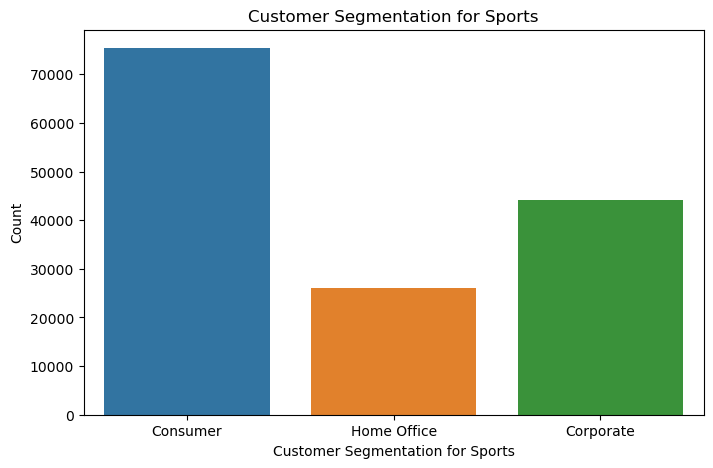

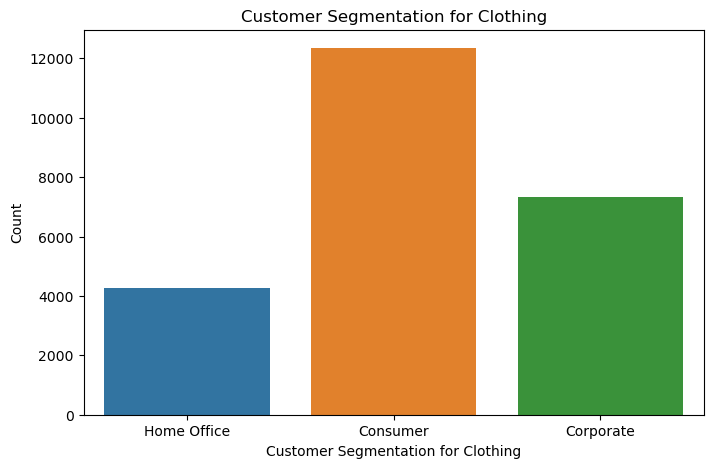

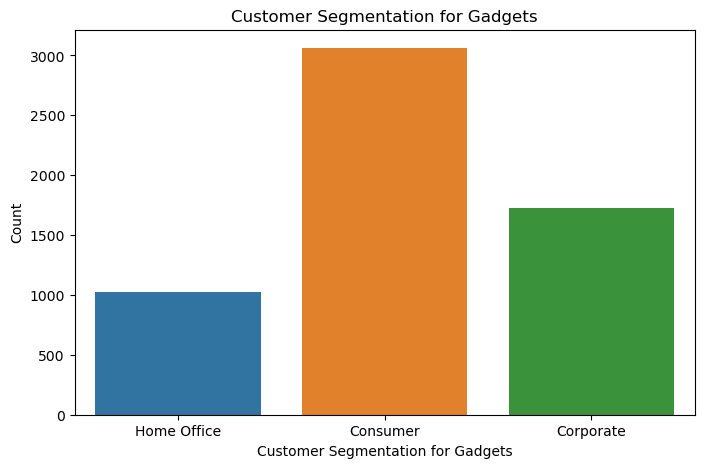

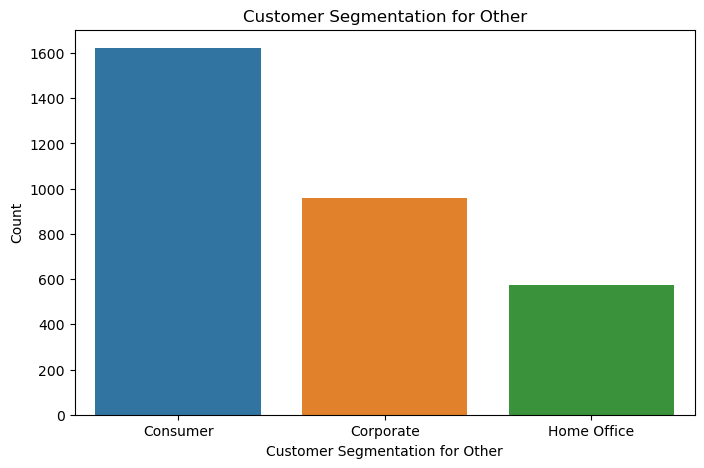

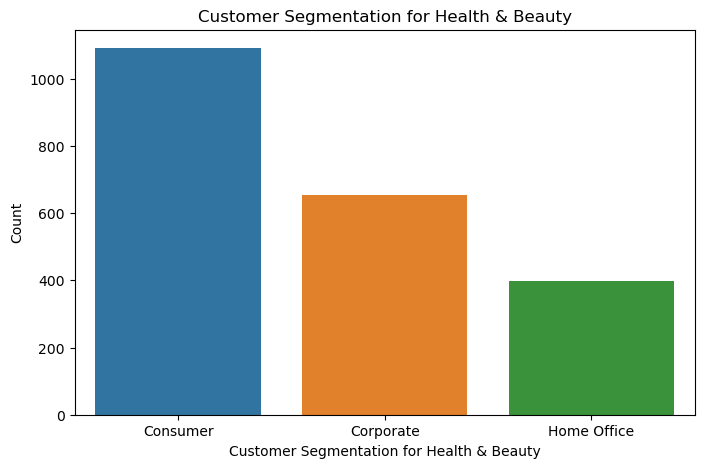

In [32]:
unique_categories = data['Category_Class'].unique()

# Plotting separate count plots for each category
for category in unique_categories:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data[data['Category_Class'] == category], x='Customer Segment')
    plt.title(f'Customer Segmentation for {category}')
    plt.xlabel(f'Customer Segmentation for {category}')
    plt.ylabel('Count')
    plt.show()

In [33]:
category_class_sales = data.groupby('Category_Class')['Sales'].sum().reset_index()
category_class_sales = category_class_sales.sort_values(by = 'Sales', ascending = False)

In [34]:
category_class_sales

,Category_Class,Sales
4,Sports,3.054370e+07
0,Clothing,3.728705e+06
1,Gadgets,1.606211e+06
3,Other,6.663664e+05
2,Health & Beauty,2.397520e+05


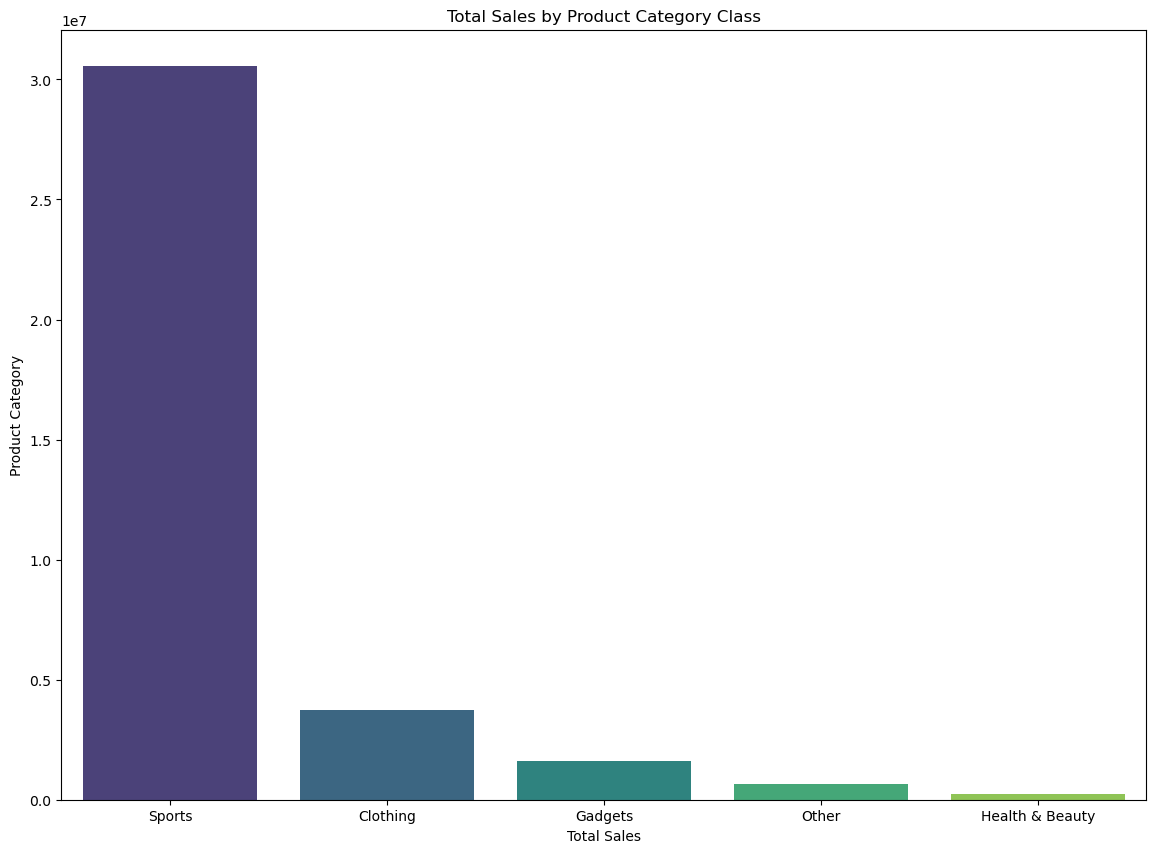

In [35]:
# Using bar-plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Category_Class', y='Sales', data=category_class_sales, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Total Sales by Product Category Class')
plt.show()

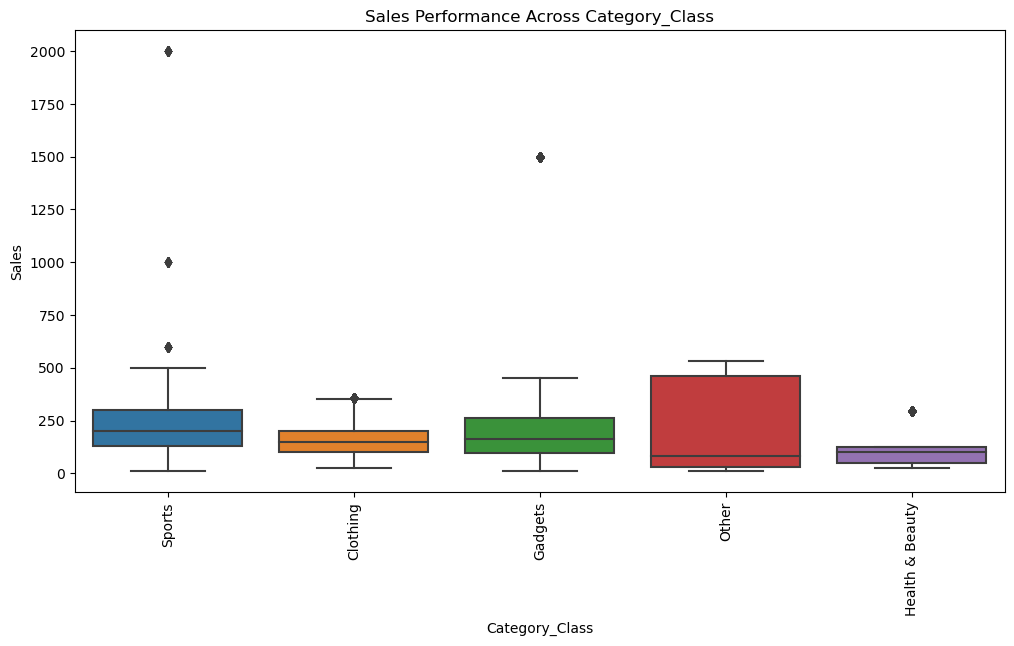

In [36]:
# Using box-plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category_Class', y='Sales', data=data)
plt.xticks(rotation=90)
plt.title('Sales Performance Across Category_Class')
plt.show()

In [37]:
# Check the demand forcasting of each category
# 

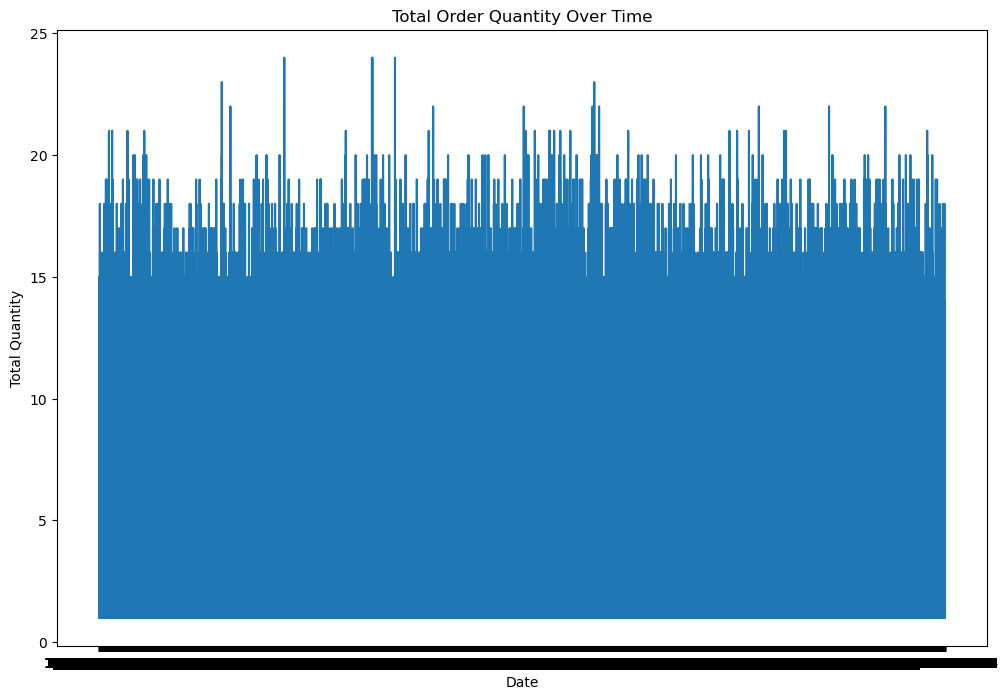

In [38]:
# Orders over time
plt.figure(figsize=(12, 8))
daily_orders = data.groupby(['Order_Date'])['Order Item Quantity'].sum().reset_index()
sns.lineplot(data=daily_orders, x='Order_Date', y='Order Item Quantity')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

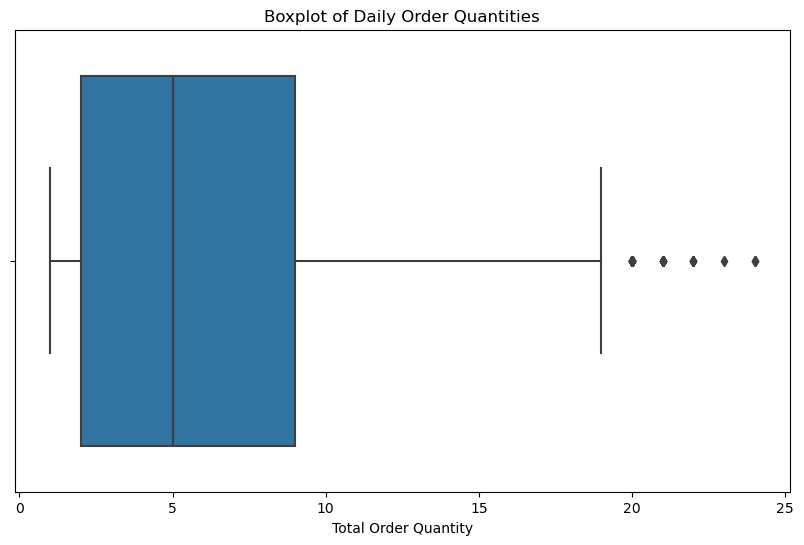

In [39]:
# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=daily_orders['Order Item Quantity'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

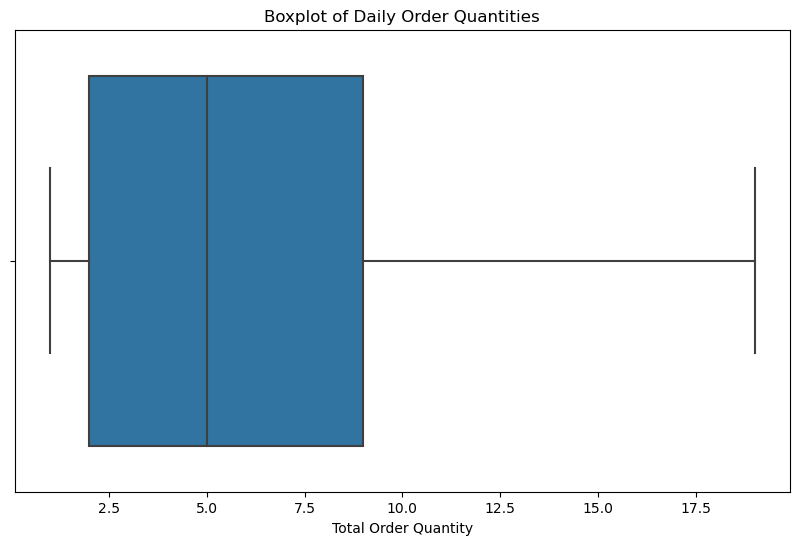

In [40]:
# remove outliers
# Aggregate order quantities by date

# Calculate Q1, Q3, and IQR
Q1 = daily_orders['Order Item Quantity'].quantile(0.25)
Q3 = daily_orders['Order Item Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_daily_orders = daily_orders[(daily_orders['Order Item Quantity'] >= lower_bound) & 
                               (daily_orders['Order Item Quantity'] <= upper_bound)]

# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_daily_orders['Order Item Quantity'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

In [41]:
How does product category relates to sales?
Why does Sports category has more sales than other category?
How can we predict the sales of the product?
Check if apply discount on a product affects sales of a product?

Object `sales` not found.
Object `product` not found.
Object `product` not found.


### Inventory Management using XgBoost

How does the product category relate to sales performance, and can this insight inform inventory stocking?

In [42]:
data['Order_Date']

0         1/31/2018 22:56
1         1/13/2018 12:27
2         1/13/2018 12:06
3         1/13/2018 11:45
4         1/13/2018 11:24
               ...       
180514     1/16/2016 3:40
180515     1/16/2016 1:34
180516    1/15/2016 21:00
180517    1/15/2016 20:18
180518    1/15/2016 18:54
Name: Order_Date, Length: 180519, dtype: object

In [43]:
data_inventory = data.copy()

In [44]:
# Splitting date and time separately
data_inventory[['Date', 'Time']] = data_inventory['Order_Date'].str.split(' ', 1, expand=True)

# Splitting the date further into year, month, and day
date_parts = data_inventory['Date'].str.split("/", n=2, expand=True)
data_inventory['year'] = date_parts[2].astype('int')
data_inventory['month'] = date_parts[0].astype('int')
data_inventory['day'] = date_parts[1].astype('int')

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/2262875939.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data_inventory[['Date', 'Time']] = data_inventory['Order_Date'].str.split(' ', 1, expand=True)


In [45]:
data_inventory.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Category_Class,Date,Time,year,month,day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,Sports,1/31/2018,22:56,2018,1,31
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,Sports,1/13/2018,12:27,2018,1,13
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,Sports,1/13/2018,12:06,2018,1,13
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,Sports,1/13/2018,11:45,2018,1,13
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,Sports,1/13/2018,11:24,2018,1,13


In [46]:
from datetime import datetime 
import calendar

In [47]:
def weekend_or_weekday(year,month,day): 
      
    d = datetime(year,month,day) 
    if d.weekday()>4: 
        return 1
    else: 
        return 0

In [48]:
data_inventory['weekend'] = data_inventory.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1) 
data_inventory.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Status,shipping date (DateOrders),Shipping Mode,Category_Class,Date,Time,year,month,day,weekend
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,0,2/3/2018 22:56,Standard Class,Sports,1/31/2018,22:56,2018,1,31,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,0,1/18/2018 12:27,Standard Class,Sports,1/13/2018,12:27,2018,1,13,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,0,1/17/2018 12:06,Standard Class,Sports,1/13/2018,12:06,2018,1,13,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,0,1/16/2018 11:45,Standard Class,Sports,1/13/2018,11:45,2018,1,13,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,0,1/15/2018 11:24,Standard Class,Sports,1/13/2018,11:24,2018,1,13,1


In [49]:
data_inventory.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product

In [50]:
data_inventory['year'].nunique()

4

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/352320405.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 1)
/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/352320405.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_inventory.groupby(col).mean()['Sales'].plot.bar()
/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/352320405.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_inventory.groupby(co

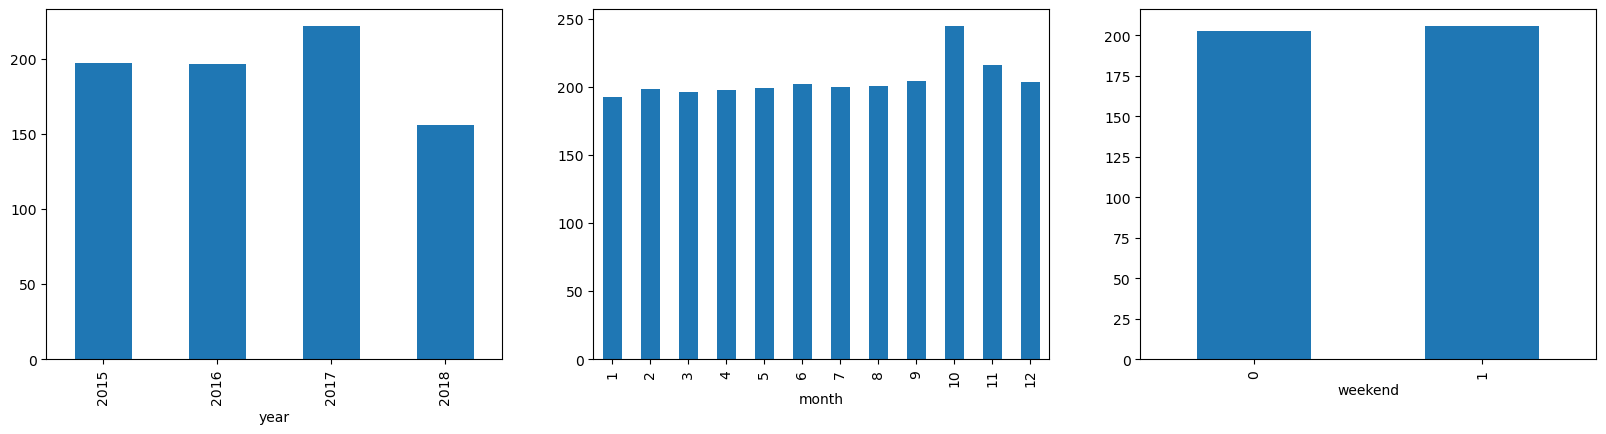

In [51]:
features = ['year', 'month', 'weekend'] 
  
plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    data_inventory.groupby(col).mean()['Sales'].plot.bar() 
plt.show()

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/2903053541.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_inventory.groupby('day').mean()['Sales'].plot()


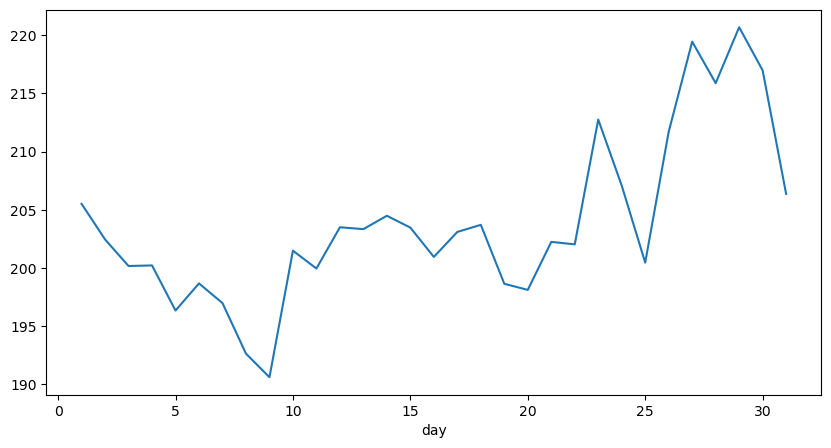

In [52]:
plt.figure(figsize=(10,5)) 
data_inventory.groupby('day').mean()['Sales'].plot() 
plt.show()

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/4082662989.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_inventory.corr() > 0.8,


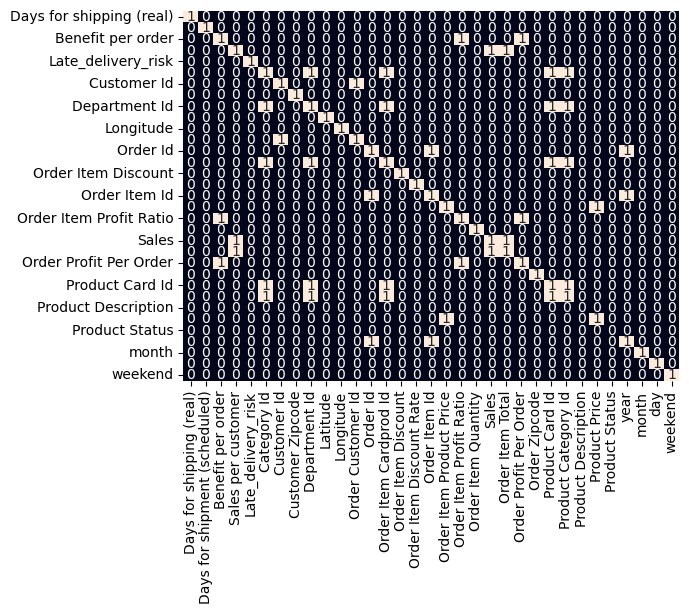

In [53]:
sns.heatmap(data_inventory.corr() > 0.8, 
           annot=True, 
           cbar=False) 
plt.show()

As the data in the sales column is continuous let’s check the distribution of it and check whether there are some outliers in this column or not.

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/3271113982.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/3271113982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_inventory['Sales'])


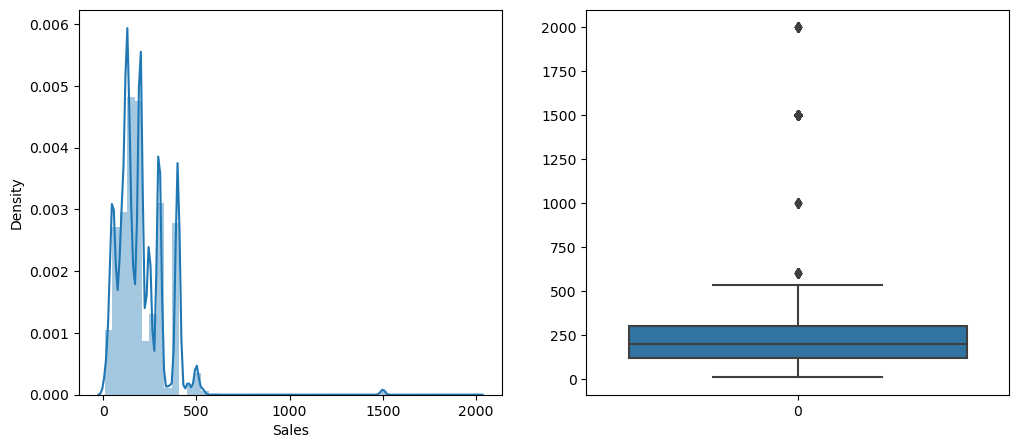

In [54]:
plt.subplots(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
sns.distplot(data_inventory['Sales']) 
  
plt.subplot(1, 2, 2) 
sns.boxplot(data_inventory['Sales']) 
plt.show() 

As we observed, let’s remove the outliers which are present in the data.

In [55]:
data_inventory = data_inventory[data_inventory['Sales']<400]

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_79713/4276317233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_inventory['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

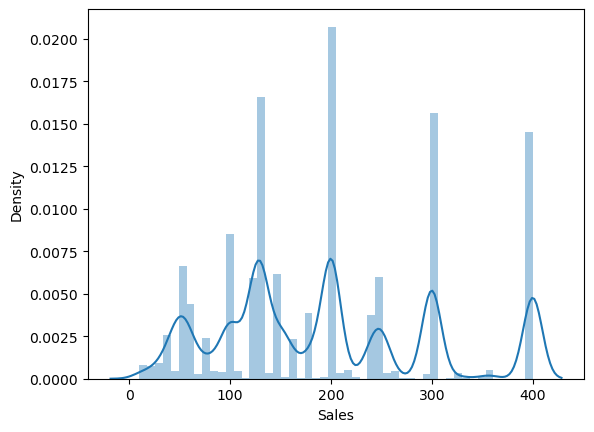

In [56]:
sns.distplot(data_inventory['Sales']) 

In [57]:
data_train = data_inventory.copy()

In [58]:
data_train.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product

In [59]:
len(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Image',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Category_Class', 'year',
       'month', 'Date', 'Time', 'day', 'weekend'])

60

In [60]:
len(['Sales', 'year', 'Time', 'Date', 'Product Category Id', 'Product Description', 'Product Image',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode', 'Category_Class','Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id','Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode'])

52

#### Model Training

In [61]:
#features = data_train.drop(['Sales', 'year', 'Time', 'Date', 'Product Category Id', 'Product Description', 'Product Image',
       #'Product Name', 'Product Price', 'Product Status',
       #'shipping date (DateOrders)', 'Shipping Mode', 'Category_Class','Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       #'Benefit per order', 'Sales per customer', 'Delivery Status',
       #'Late_delivery_risk', 'Category Id','Customer City',
       #'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       #'Customer Lname', 'Customer Password', 'Customer Segment',
       #'Customer State', 'Customer Street', 'Customer Zipcode',
       #'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       #'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       #'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Product Card Id',
       #'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio', 'Order Profit Per Order', 'Order Region',
       #'Order State', 'Order Status', 'Order Zipcode'], axis=1)
        
features = data_train.drop(['Sales', 'year', 'Time', 'Date', 'Product Category Id', 'Product Description', 'Product Image',
       'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Category_Class','Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id','Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order_Date',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Product Card Id',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode'], axis=1) 
target = data_train['Sales'].values 

In [62]:
features.head()

,Category Name,Order Item Product Price,Order Item Quantity,Order Item Total,month,day,weekend
0,Sporting Goods,327.75,1,314.640015,1,31,0
1,Sporting Goods,327.75,1,311.359985,1,13,1
2,Sporting Goods,327.75,1,309.720001,1,13,1
3,Sporting Goods,327.75,1,304.809998,1,13,1
4,Sporting Goods,327.75,1,298.250000,1,13,1


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
# Creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the 'Category Name' column and transform it
features['Category Name Encoded'] = label_encoder.fit_transform(features['Category Name'])

# Displaying the transformed column along with original columns
print(features[['Category Name', 'Category Name Encoded']].head())

    Category Name  Category Name Encoded
0  Sporting Goods                     36
1  Sporting Goods                     36
2  Sporting Goods                     36
3  Sporting Goods                     36
4  Sporting Goods                     36


In [65]:
features.tail()

,Category Name,Order Item Product Price,Order Item Quantity,Order Item Total,month,day,weekend,Category Name Encoded
180514,Fishing,399.980011,1,399.980011,1,16,1,15
180515,Fishing,399.980011,1,395.980011,1,16,1,15
180516,Fishing,399.980011,1,391.980011,1,15,0,15
180517,Fishing,399.980011,1,387.980011,1,15,0,15
180518,Fishing,399.980011,1,383.980011,1,15,0,15


In [66]:
features = features.drop(['Category Name'], axis = 1)

In [67]:
features

,Order Item Product Price,Order Item Quantity,Order Item Total,month,day,weekend,Category Name Encoded
0,327.750000,1,314.640015,1,31,0,36
1,327.750000,1,311.359985,1,13,1,36
2,327.750000,1,309.720001,1,13,1,36
3,327.750000,1,304.809998,1,13,1,36
4,327.750000,1,298.250000,1,13,1,36
...,...,...,...,...,...,...,...
180514,399.980011,1,399.980011,1,16,1,15
180515,399.980011,1,395.980011,1,16,1,15
180516,399.980011,1,391.980011,1,15,0,15
180517,399.980011,1,387.980011,1,15,0,15


In [68]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, 
                                                  test_size = 0.15, 
                                                  random_state=22) 
X_train.shape, X_val.shape

((149472, 7), (26378, 7))

In [69]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)

In [71]:
from sklearn.metrics import mean_absolute_error as mae 

In [73]:
models = [LinearRegression(), XGBRegressor()] 
  
for i in range(len(models)): 
    models[i].fit(X_train, Y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train) 
    print('Training Error: ', mae(Y_train, train_preds)) 
  
    val_preds = models[i].predict(X_val) 
    print('Validation Error: ', mae(Y_val, val_preds)) 
    print() 

LinearRegression() : 
Training Error:  10.902479295575638
Validation Error:  10.942901676163565

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error:  0.13853815136144823
Validation Error:  0.15242199161784567

